<a href="https://colab.research.google.com/github/DamodaraBarbosa/linear_regression_studies/blob/main/Student_Predict_Grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set()

# Carregando os dados em um dataframe

In [3]:
data = pd.read_csv('/content/drive/MyDrive/PracticingDataLinearRegression/student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Já é possível notar que a base de dados não contém dados faltantes.

In [5]:
f'A base de dados contém {data.shape[1]} colunas e {data.shape[0]} linhas'

'A base de dados contém 33 colunas e 395 linhas'

# Descrição dos dados

Retirada de: https://www.kaggle.com/datasets/dipam7/student-grade-prediction?datasetId=52721&sortBy=voteCount

Data Set Information:
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

Attribute Information:
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater 
than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - 
excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)


absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

# Análise exploratória das variáveis

## Coluna `school`

In [6]:
data['school'].unique()

array(['GP', 'MS'], dtype=object)

A base de dados contém informações de apenas duas escolas:
* GP - Gabriel Pereira;
* MS - Mousinha da Silveira.

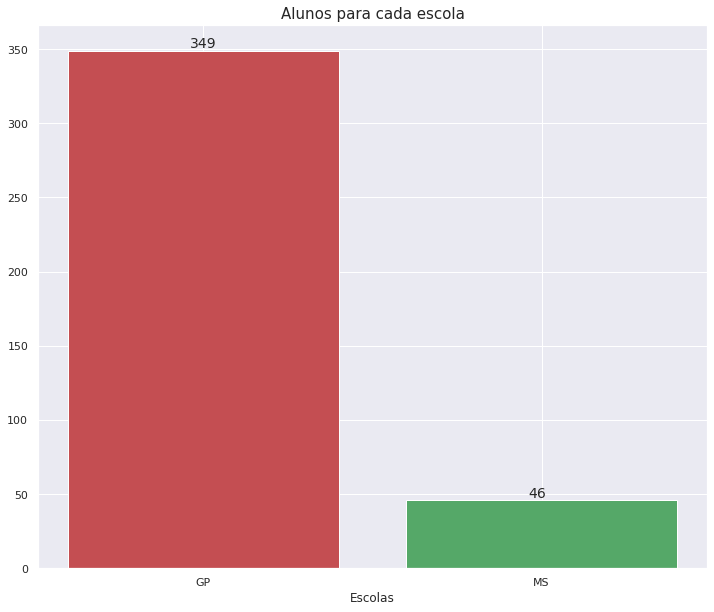

In [7]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['school'].value_counts().keys(), data['school'].value_counts().values, color= ['r', 'g'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.xlabel('Escolas')
plt.title('Alunos para cada escola', fontsize= 15)
plt.show()

## Coluna `sex` 

In [8]:
data['sex'].unique()

array(['F', 'M'], dtype=object)

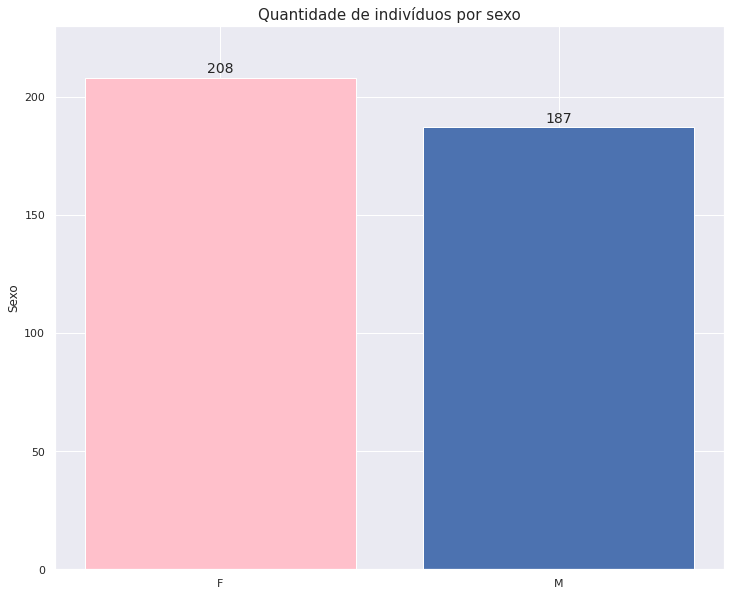

In [9]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['sex'].value_counts().keys(), data['sex'].value_counts().values, color= ['pink', 'b'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.ylim([0, 230]) # define o limite do eixo y do gráfico
plt.title('Quantidade de indivíduos por sexo', fontsize= 15)
plt.ylabel('Sexo')
plt.show()

* Quem tira as melhores notas, meninos ou meninas?

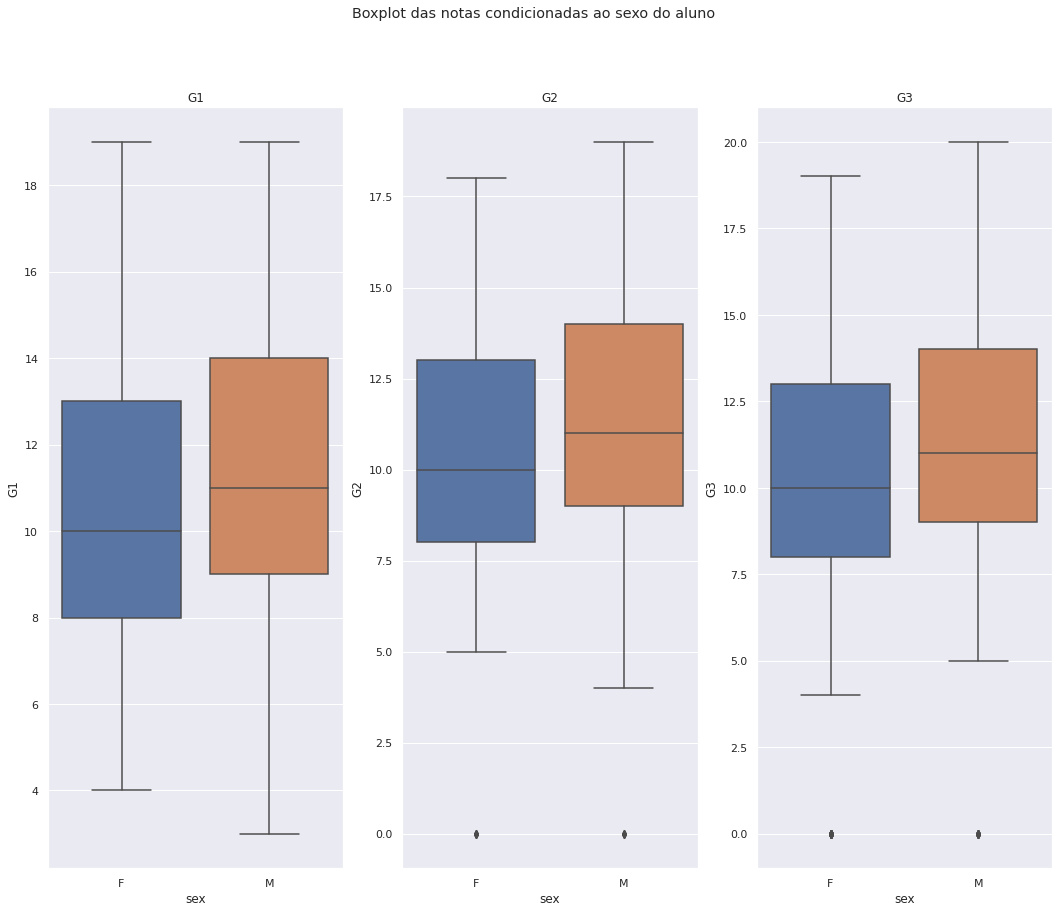

In [10]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
plt.suptitle('Boxplot das notas condicionadas ao sexo do aluno')
ax1 = sns.boxplot(data= data, x= 'sex', y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= 'sex', y= 'G2', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= data, x= 'sex', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

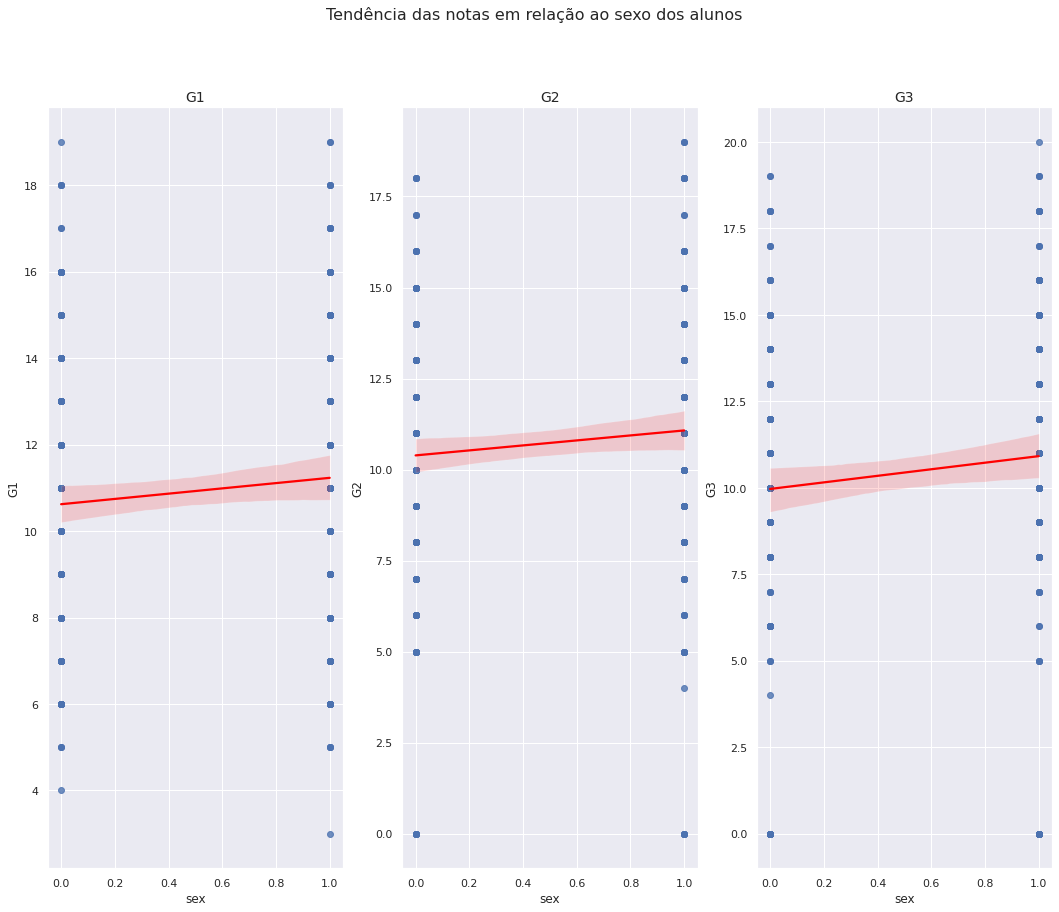

In [11]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
fig.suptitle('Tendência das notas em relação ao sexo dos alunos', fontsize= 16)
ax1 = sns.regplot(data= data, x= data['sex'].map({'F': 0, 'M': 1}), y= 'G1', ax= axes[0], line_kws= {'color': 'red'})
ax1.set_title('G1', fontsize= 14)
ax2 = sns.regplot(data= data, x= data['sex'].map({'F': 0, 'M': 1}), y= 'G2', ax= axes[1], line_kws= {'color': 'red'})
ax2.set_title('G2', fontsize= 14)
ax3 = sns.regplot(data= data, x= data['sex'].map({'F': 0, 'M': 1}), y= 'G3', ax= axes[2], line_kws= {'color': 'red'})
ax3.set_title('G3', fontsize= 14)
plt.show()

Os gráficos de *boxplot* e regressão linear mostram que os garotos deste banco de dados tendem a tirar melhores notas.

## Coluna `age`

In [12]:
data['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

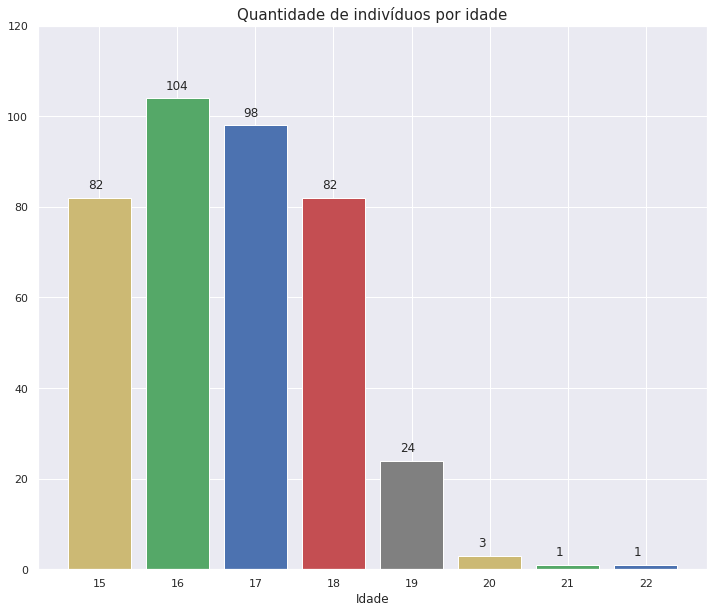

In [13]:
plt.figure(figsize= (12, 10))
bars = plt.bar(
    data['age'].value_counts().sort_index().keys(), 
    data['age'].value_counts().sort_index().values,
    color= ['y', 'g', 'b', 'r', 'gray']
)

for bar in bars:
  plt.text(bar.get_x() + 0.25, bar.get_height() + 2, bar.get_height(), fontsize= 12)

plt.ylim([0, 120])
plt.title('Quantidade de indivíduos por idade', fontsize= 15)
plt.xlabel('Idade')
plt.show()

* A idade do aluno influencia suas notas?

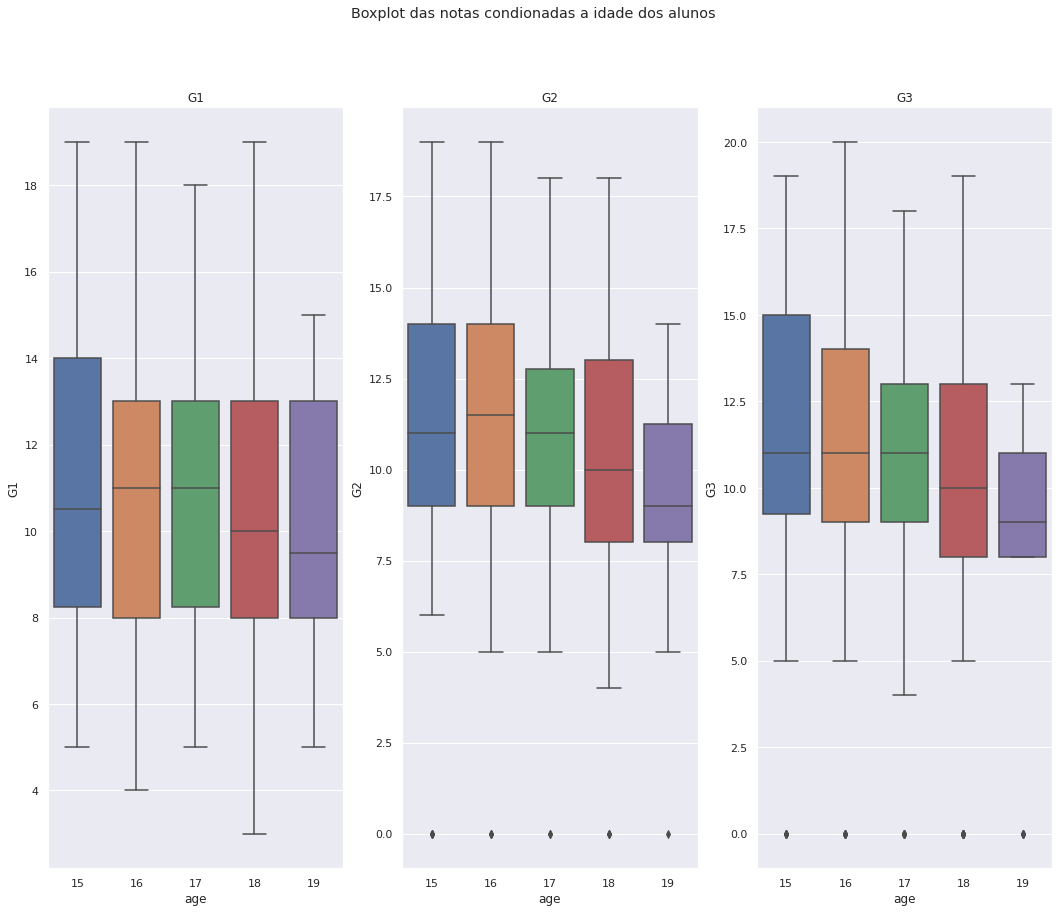

In [14]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
fig.suptitle('Boxplot das notas condionadas a idade dos alunos')
ax1 = sns.boxplot(data= data.query('age < 20'), x= 'age', y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data.query('age < 20'), x= 'age', y= 'G2', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= data.query('age < 20'), x= 'age', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

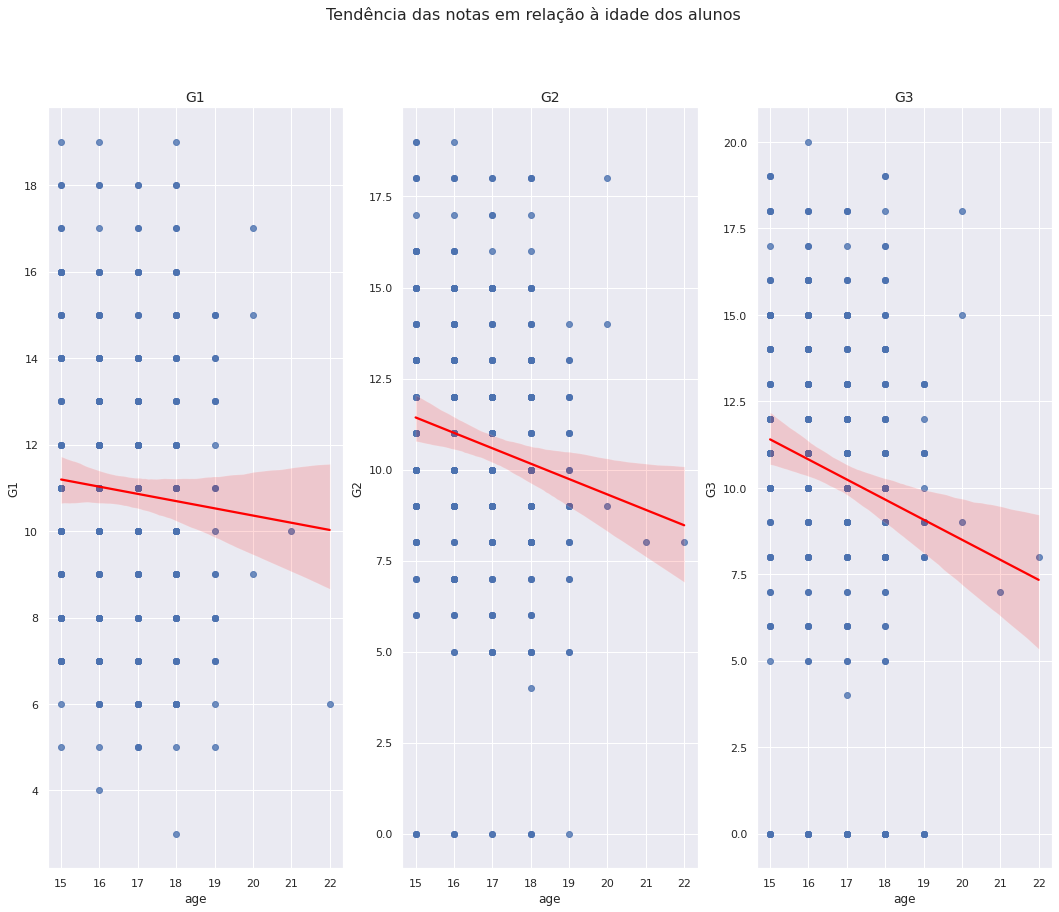

In [15]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
fig.suptitle('Tendência das notas em relação à idade dos alunos', fontsize= 16)
ax1 = sns.regplot(data= data, x= 'age', y= 'G1', ax= axes[0], line_kws= {'color': 'red'})
ax1.set_title('G1', fontsize= 14)
ax2 = sns.regplot(data= data, x= 'age', y= 'G2', ax= axes[1], line_kws= {'color': 'red'})
ax2.set_title('G2', fontsize= 14)
ax3 = sns.regplot(data= data, x= 'age', y= 'G3', ax= axes[2], line_kws= {'color': 'red'})
ax3.set_title('G3', fontsize= 14)
plt.show()

## Coluna `address`

In [16]:
data['address'].unique()

array(['U', 'R'], dtype=object)

A variável `address` contém apenas dois valores:
* U - para urbano;
* R - para rural.

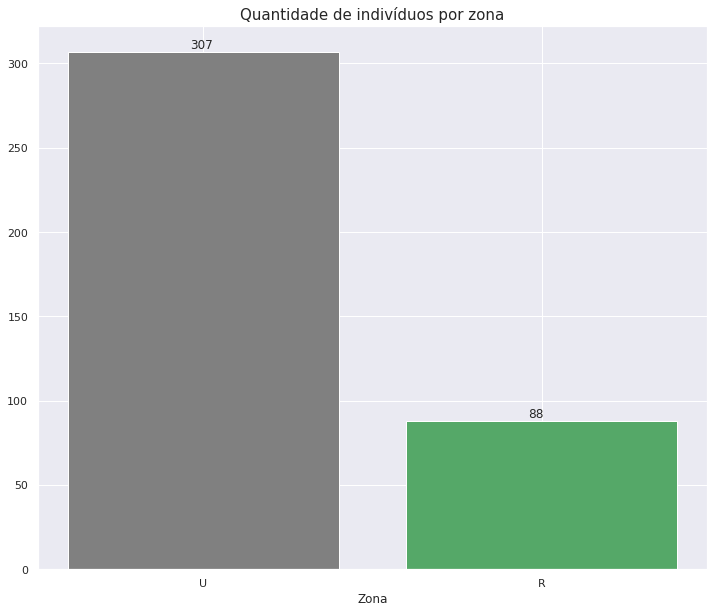

In [17]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['address'].value_counts().keys(), data['address'].value_counts().values, color= ['gray', 'g'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 12)

plt.title('Quantidade de indivíduos por zona', fontsize= 15)
plt.xlabel('Zona')
plt.show()

* A localidade em que o aluno mora influcia suas notas?

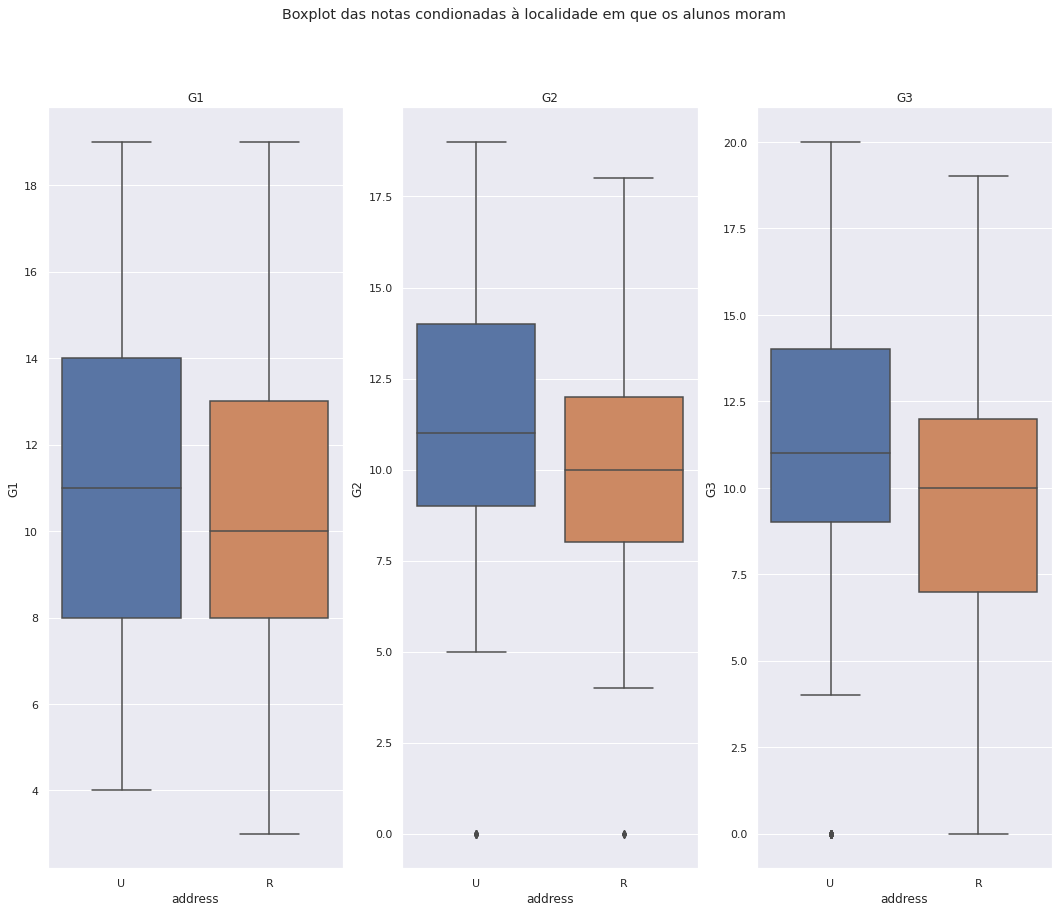

In [18]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
fig.suptitle('Boxplot das notas condionadas à localidade em que os alunos moram')
ax1 = sns.boxplot(data= data, x= 'address', y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= 'address', y= 'G2', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= data, x= 'address', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

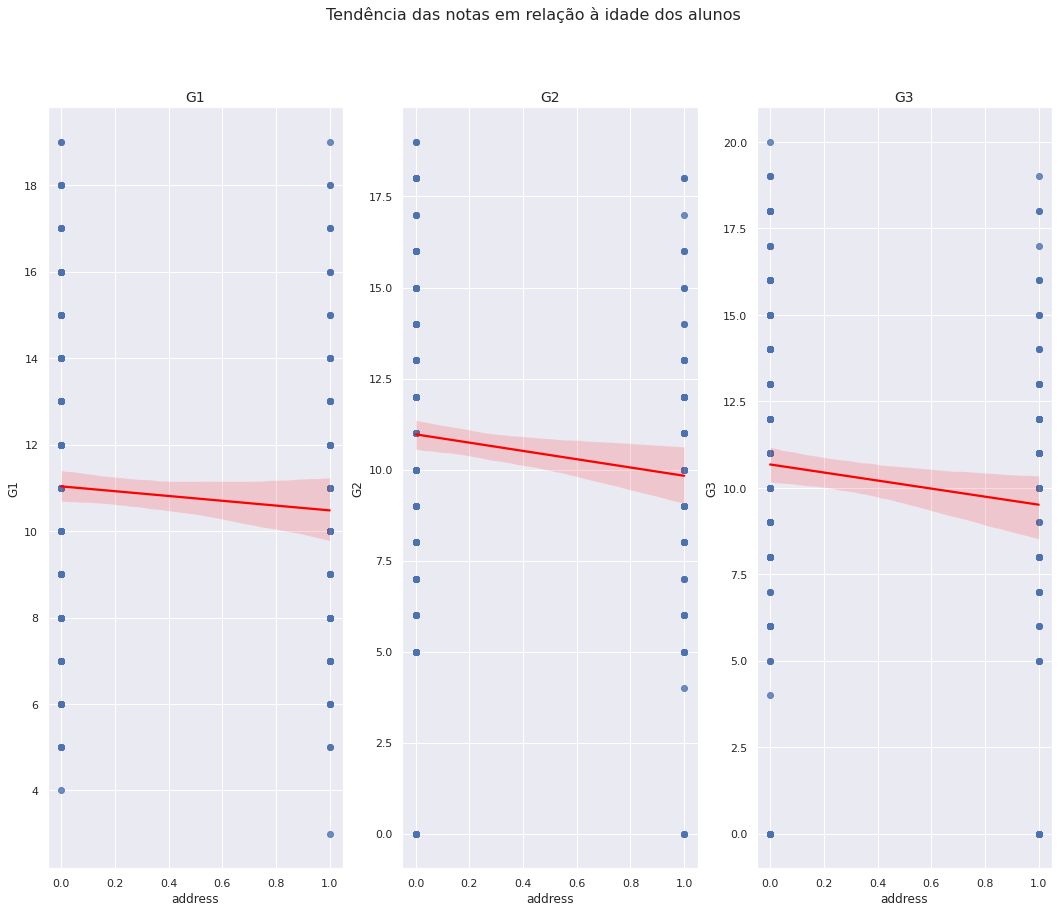

In [19]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
fig.suptitle('Tendência das notas em relação à idade dos alunos', fontsize= 16)
ax1 = sns.regplot(data= data, x= data['address'].map({'U': 0, 'R': 1}), y= 'G1', ax= axes[0], line_kws= {'color': 'red'})
ax1.set_title('G1', fontsize= 14)
ax2 = sns.regplot(data= data, x= data['address'].map({'U': 0, 'R': 1}), y= 'G2', ax= axes[1], line_kws= {'color': 'red'})
ax2.set_title('G2', fontsize= 14)
ax3 = sns.regplot(data= data, x= data['address'].map({'U': 0, 'R': 1}), y= 'G3', ax= axes[2], line_kws= {'color': 'red'})
ax3.set_title('G3', fontsize= 14)
plt.show()

Foi feita um pequeno tratamento nos dados para que **urbano** seja 0 e **rural** seja 1. Observa uma tendência para notas menores caso o aluno viva em meio rural.

## Coluna `famsize`

In [20]:
data['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

A variável `famsize` contém dois tipos de dados:
* GT3 - maior do que 3 integrantes;
* LE3 - menor ou iguala 3 integrandes.

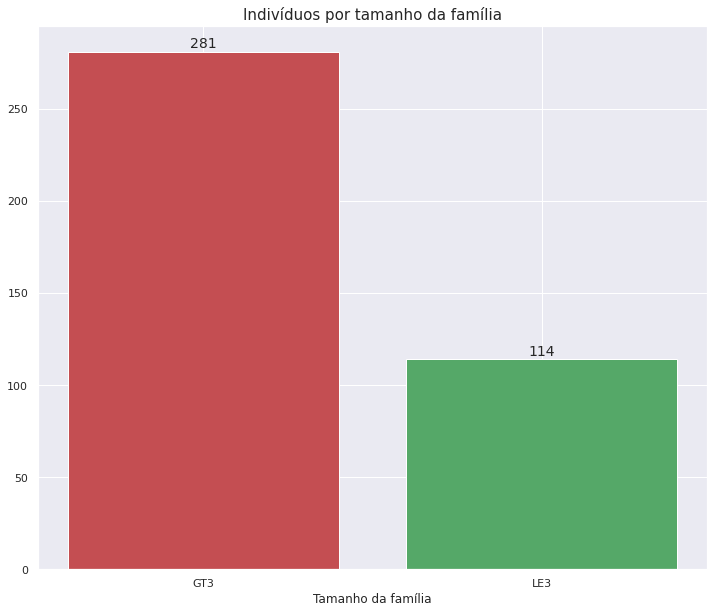

In [21]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['famsize'].value_counts().keys(), data['famsize'].value_counts().values, color= ['r', 'g'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.title('Indivíduos por tamanho da família', fontsize= 15)
plt.xlabel('Tamanho da família')
plt.show()

* O tamanho da família influencia nas notas dos alunos?

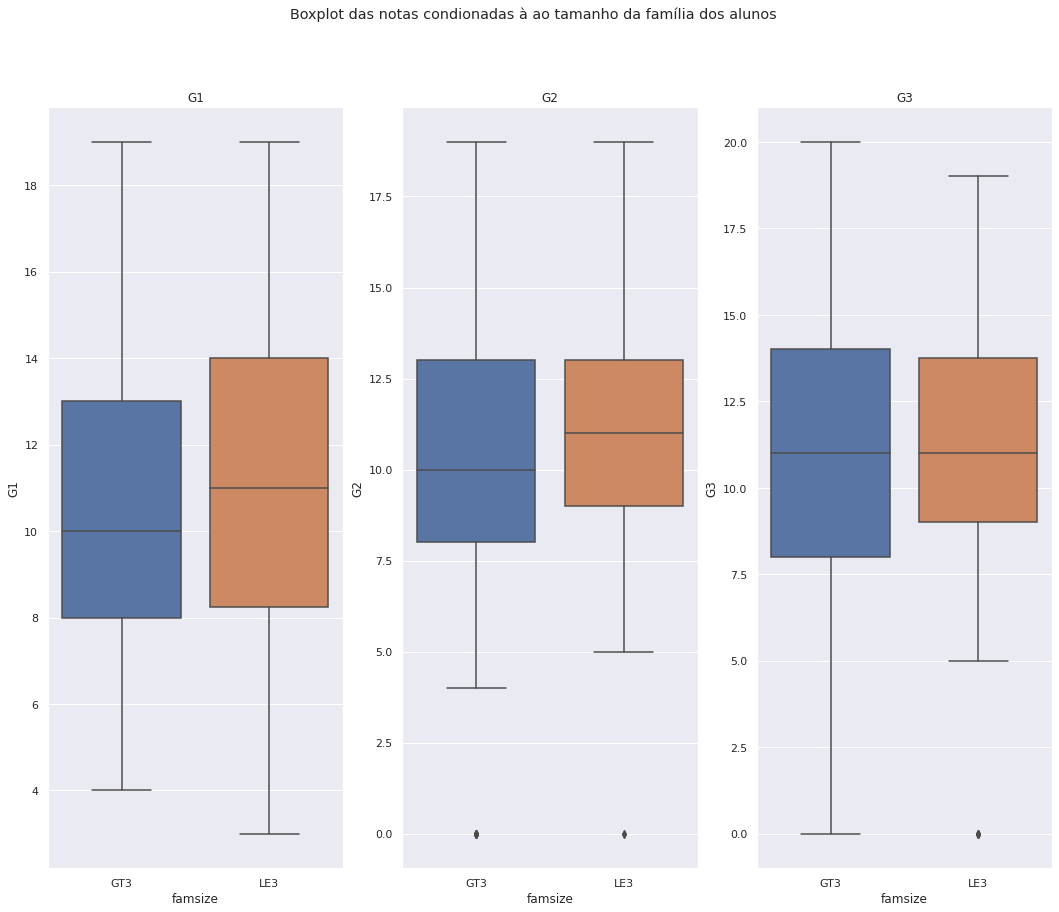

In [22]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
fig.suptitle('Boxplot das notas condionadas à ao tamanho da família dos alunos')
ax1 = sns.boxplot(data= data, x= 'famsize', y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= 'famsize', y= 'G2', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= data, x= 'famsize', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

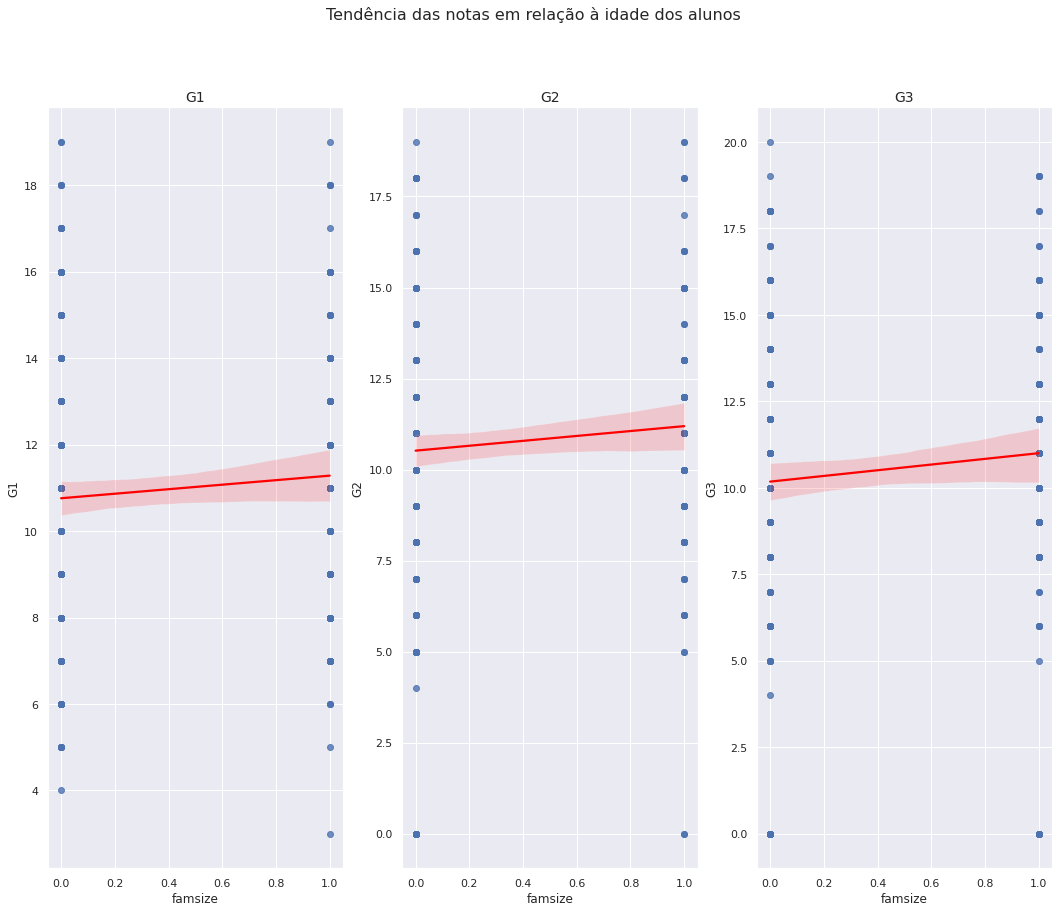

In [23]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
fig.suptitle('Tendência das notas em relação à idade dos alunos', fontsize= 16)
ax1 = sns.regplot(data= data, x= data['famsize'].map({'GT3': 0, 'LE3': 1}), y= 'G1', ax= axes[0], line_kws= {'color': 'red'})
ax1.set_title('G1', fontsize= 14)
ax2 = sns.regplot(data= data, x= data['famsize'].map({'GT3': 0, 'LE3': 1}), y= 'G2', ax= axes[1], line_kws= {'color': 'red'})
ax2.set_title('G2', fontsize= 14)
ax3 = sns.regplot(data= data, x= data['famsize'].map({'GT3': 0, 'LE3': 1}), y= 'G3', ax= axes[2], line_kws= {'color': 'red'})
ax3.set_title('G3', fontsize= 14)
plt.show()

Os gráficos mostram que alunos que fazem parte de famílias menores tendem a ter melhores notas.

## Coluna `Pstatus`

Indica o *status* de relacionamento entre os pais do indivíduo.

In [24]:
data['Pstatus'].unique()

array(['A', 'T'], dtype=object)

Em que:
* A - *apart*, ou seja, separados;
* T - *living together*, ou seja, vivendo juntos.

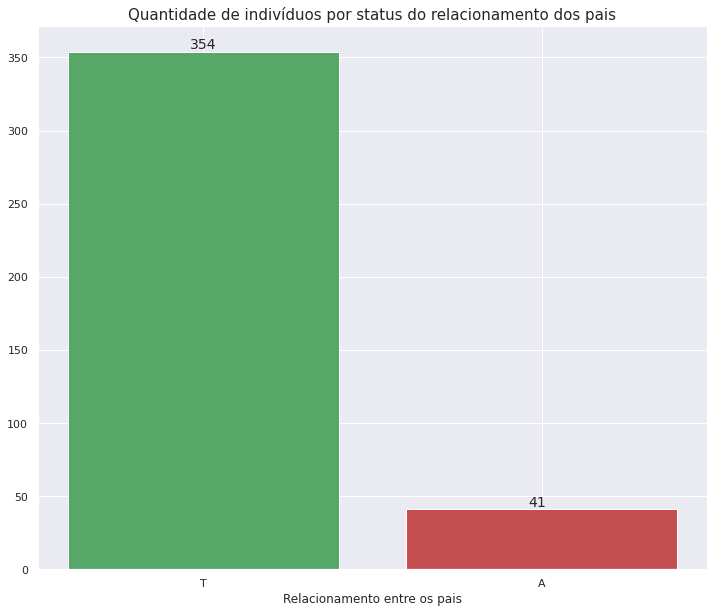

In [25]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['Pstatus'].value_counts().keys(), data['Pstatus'].value_counts().values, color= ['g', 'r'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.title('Quantidade de indivíduos por status do relacionamento dos pais', fontsize= 15)
plt.xlabel('Relacionamento entre os pais')
plt.show()

* O *status* do relacionamento entre os pais influencia o rendimento escolar dos filhos?

In [26]:
data.groupby('Pstatus')[['G1', 'G2', 'G3']].mean()

,G1,G2,G3
Pstatus,,,
A,11.073171,11.170732,11.195122
T,10.889831,10.661017,10.324859


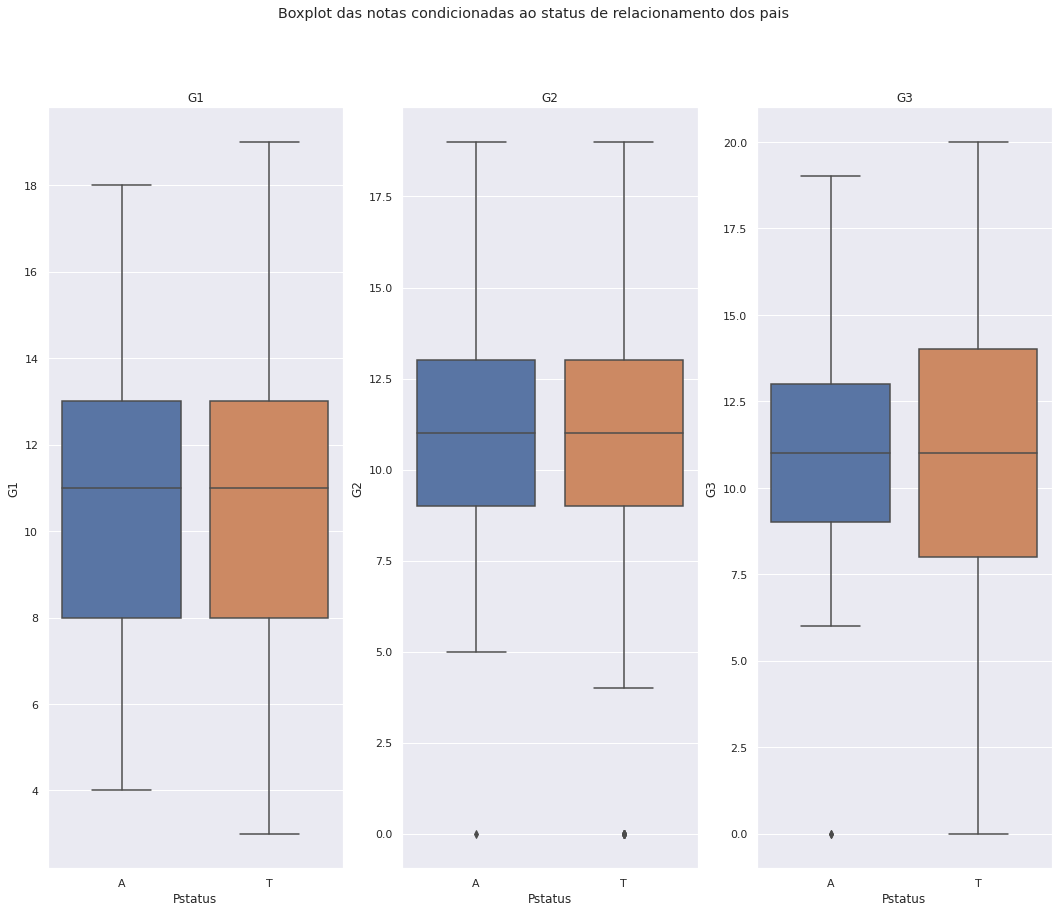

In [27]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
plt.suptitle('Boxplot das notas condicionadas ao status de relacionamento dos pais')
ax1 = sns.boxplot(data= data, x= 'Pstatus', y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= 'Pstatus', y= 'G2', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= data, x= 'Pstatus', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

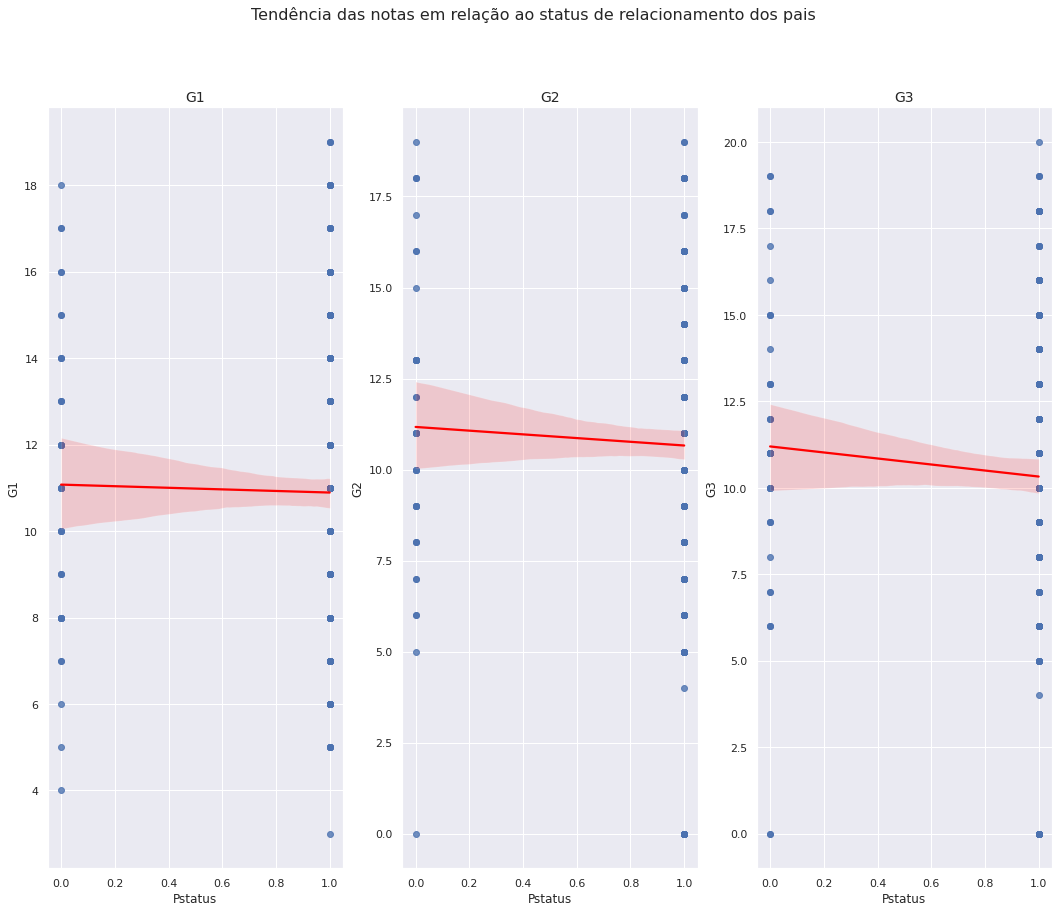

In [28]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
fig.suptitle('Tendência das notas em relação ao status de relacionamento dos pais', fontsize= 16)
ax1 = sns.regplot(data= data, x= data['Pstatus'].map({'A': 0, 'T': 1}), y= 'G1', ax= axes[0], line_kws= {'color': 'red'})
ax1.set_title('G1', fontsize= 14)
ax2 = sns.regplot(data= data, x= data['Pstatus'].map({'A': 0, 'T': 1}), y= 'G2', ax= axes[1], line_kws= {'color': 'red'})
ax2.set_title('G2', fontsize= 14)
ax3 = sns.regplot(data= data, x= data['Pstatus'].map({'A': 0, 'T': 1}), y= 'G3', ax= axes[2], line_kws= {'color': 'red'})
ax3.set_title('G3', fontsize= 14)
plt.show()

# Apart, ou seja, pais separados é representado por 0 e Together é representado por 1.

O gráfico de regressão linear mostra uma tendência de diminuição leve nas notas quando os pais vivem juntos.

## Coluna `Medu`

Informa o grau de escolaridade da mãe do indivíduo.

In [29]:
data['Medu'].unique()

array([4, 1, 3, 2, 0])

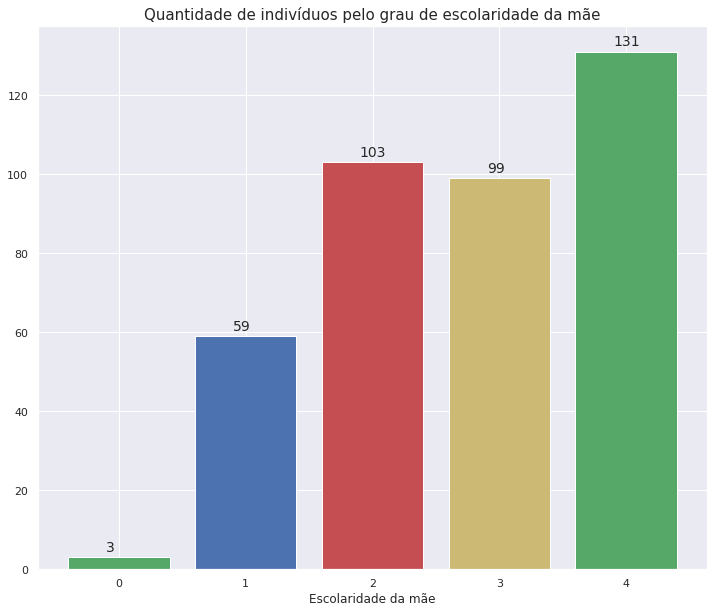

In [30]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['Medu'].value_counts().keys(), data['Medu'].value_counts().values, color= ['g', 'r', 'y', 'b'])

for bar in bars:
  plt.text(bar.get_x() + 0.3, bar.get_height() + 1.5, bar.get_height(), fontsize= 14)

plt.title('Quantidade de indivíduos pelo grau de escolaridade da mãe', fontsize= 15)
plt.xlabel('Escolaridade da mãe')
plt.show()

* O grau de escolaridade da mãe influencia no rendimento escolar do filho?

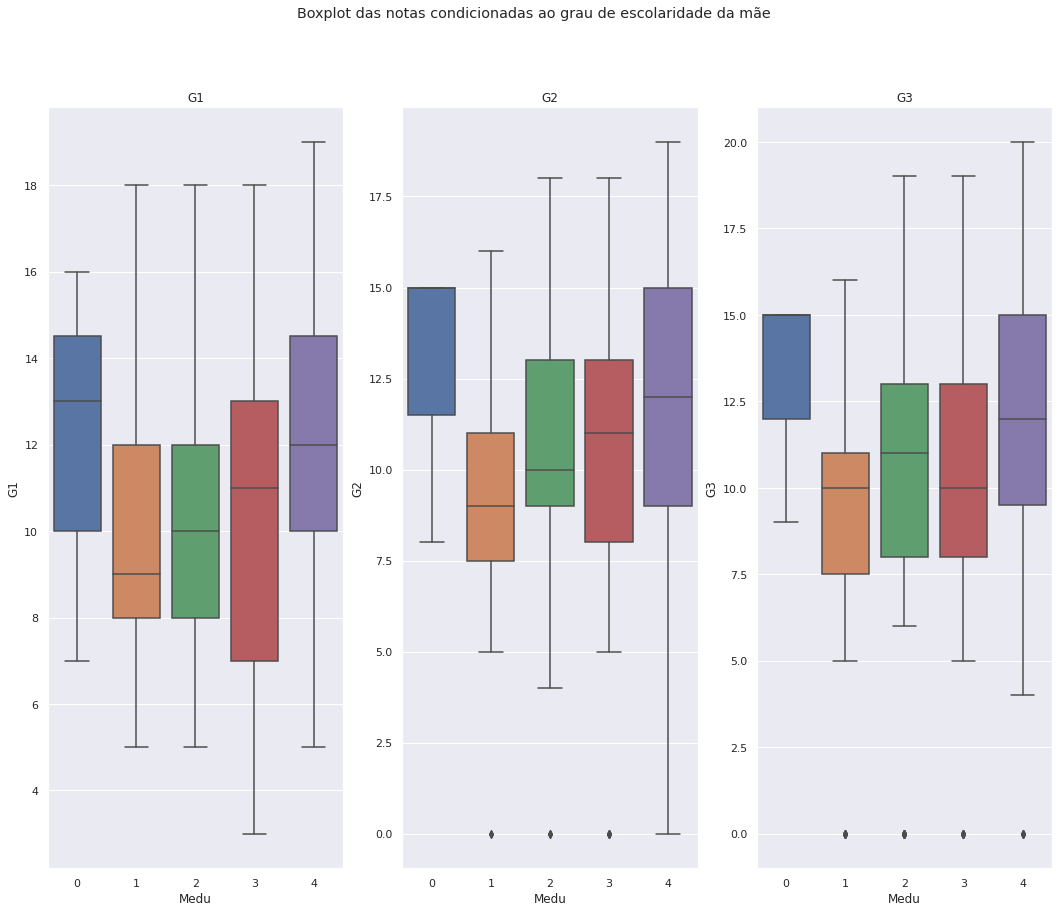

In [31]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
plt.suptitle('Boxplot das notas condicionadas ao grau de escolaridade da mãe')
ax1 = sns.boxplot(data= data, x= 'Medu', y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= 'Medu', y= 'G2', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= data, x= 'Medu', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

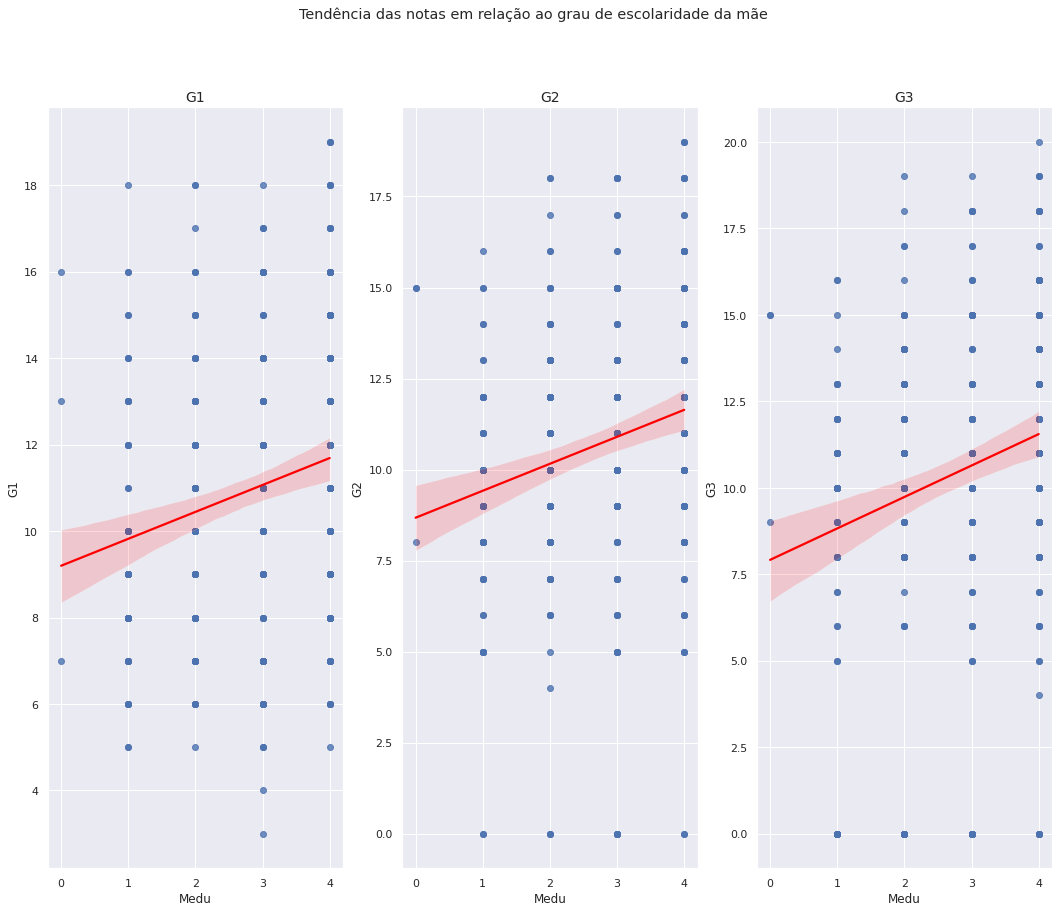

In [32]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
fig.suptitle('Tendência das notas em relação ao grau de escolaridade da mãe')
ax1 = sns.regplot(data= data, x= 'Medu', y= 'G1', line_kws= {'color': 'red'}, ax= axes[0])
ax1.set_title('G1', fontsize= 14)
ax2 = sns.regplot(data= data, x= 'Medu', y= 'G2', line_kws= {'color': 'red'}, ax= axes[1])
ax2.set_title('G2', fontsize= 14)
ax3 = sns.regplot(data= data, x= 'Medu', y= 'G3', line_kws= {'color': 'red'}, ax= axes[2])
ax3.set_title('G3', fontsize= 14)
plt.show()

## Coluna `Fedu`

É referente ao grau de escolaridade do pai.

In [33]:
data['Fedu'].unique()

array([4, 1, 2, 3, 0])

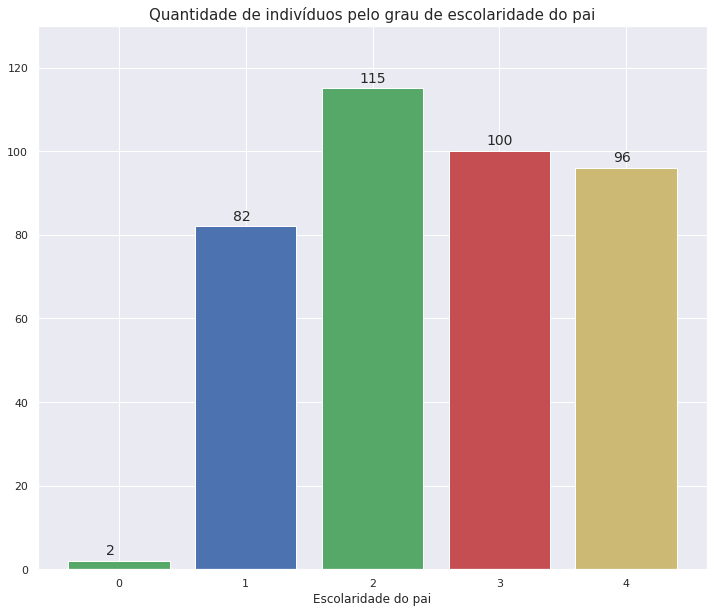

In [34]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['Fedu'].value_counts().keys(), data['Fedu'].value_counts().values, color= ['g', 'r', 'y', 'b'])

for bar in bars:
  plt.text(bar.get_x() + 0.3, bar.get_height() + 1.5, bar.get_height(), fontsize= 14)

plt.ylim([0, 130])
plt.title('Quantidade de indivíduos pelo grau de escolaridade do pai', fontsize= 15)
plt.xlabel('Escolaridade do pai')
plt.show()

*  Grau de escolaridade dos pais condicionado ao sexo do filho:

In [35]:
percent_fedu_by_girl = list((data.query('sex == "F"')['Fedu'].value_counts(normalize= True).sort_index() * 100).round(2))
# seleciona-se os dados no datasets refentes às garotas e contam-se os valores para coluna Fedu, que é expressa em porcentagem e ordenada pelo index.
# esses dados são postos em uma lista.

In [36]:
percent_fedu_by_girl.insert(0, 0) # na posição 0 da lista adiciona-se 0, pois não há pai de garota sem nenhum grau de escolaridade.

In [37]:
percent_fedu_by_boy = list((data.query('sex == "M"')['Fedu'].value_counts(normalize= True).sort_index() * 100).round(2))
# seleciona-se os dados no datasets refentes aos garotos e contam-se os valores para coluna Fedu, que é expressa em porcentagem e ordenada pelo index.
# esses dados são postos em uma lista.

In [38]:
labels = list(sorted(data['Medu'].unique())) # os valores únicos da coluna 'Medu', que equivalem aos valores de 'Fedu' são ordenados em uma lista.
x = np.arange(len(labels))
width = 0.35 # determina a largura da barra no barplot.

Função para mostrar a *label* (valor) de cada barra do gráfico. 

In [39]:
def bar_label(bars, x= 0, y= 0, font= None):
  for bar in bars:
    plt.text(bar.get_x() + x, bar.get_height() + y, bar.get_height(), fontsize= font)

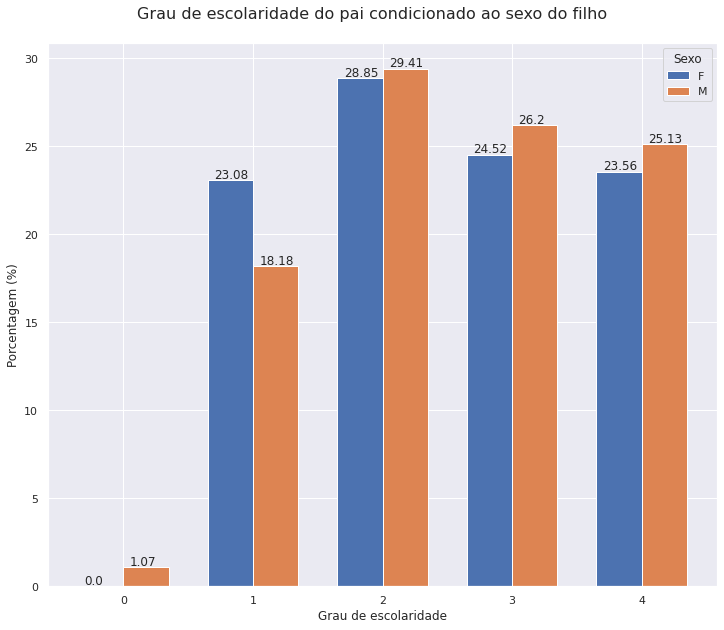

In [40]:
plt.subplots(figsize= (12, 10))
plt.suptitle('Grau de escolaridade do pai condicionado ao sexo do filho', fontsize= 16, y= 0.93) # y ajusta a posição do título, pra cima ou pra baixo.
ax1 = plt.bar(x - width/2, percent_fedu_by_girl, width, label= 'F')
bar_label(ax1, 0.05, 0.1, 12)
ax2 = plt.bar(x + width/2, percent_fedu_by_boy, width, label= 'M')
bar_label(ax2, 0.05, 0.1, 12)
plt.legend(title= 'Sexo')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Grau de escolaridade')
plt.show()

A escolaridade entre pais de meninos e meninas é próxima, com uma leve vantagem para os pais dos meninos.

* Comparação entre a escolaridade dos pais e das mães:

In [41]:
labels = list(sorted(data['Medu'].unique())) # valores únicos que são comuns tanto a coluna Medu quanto Fedu
medu = list(data['Medu'].value_counts().sort_index()) # lista com os dados da coluna Medu
fedu = list(data['Fedu'].value_counts().sort_index()) # lista com os dados da coluna Fedu

In [42]:
x = np.arange(len(labels))
width = 0.35 # define a largura da barra

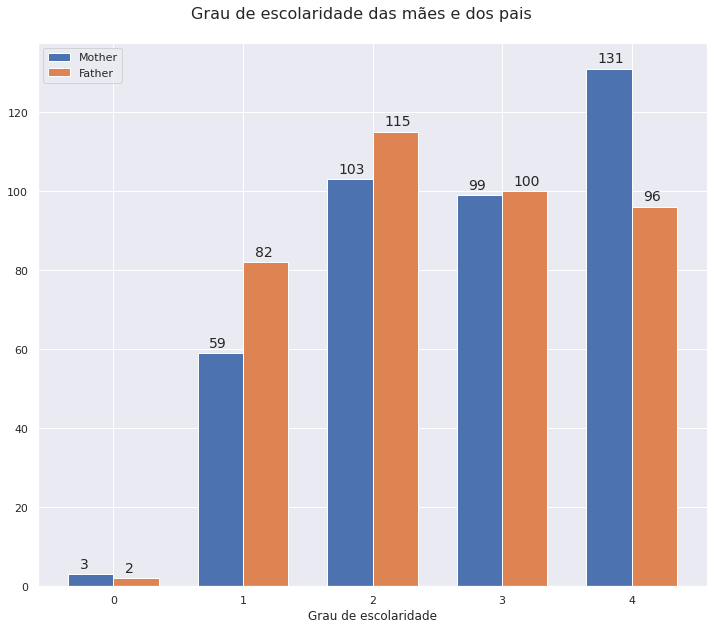

In [43]:
fig, ax = plt.subplots(figsize= (12, 10))
plt.suptitle('Grau de escolaridade das mães e dos pais', fontsize= 16, y= 0.93)
ax1 = ax.bar(x - width/2, medu, width, label= 'Mother')
bar_label(ax1, 0.09, 1.5, 14)
ax2 = ax.bar(x + width/2, fedu, width, label= 'Father')
bar_label(ax2, 0.09, 1.5, 14)
plt.legend()
plt.xlabel('Grau de escolaridade')
plt.show()

É possível observar que os pais possuem maior escolaridade até o penúltimo grau de escolarida (3), com as mulheres se destacando no último grau de escolaridade (4).

* Qual o tipo de relação entre as variáveis `Medu` e `Fedu`?

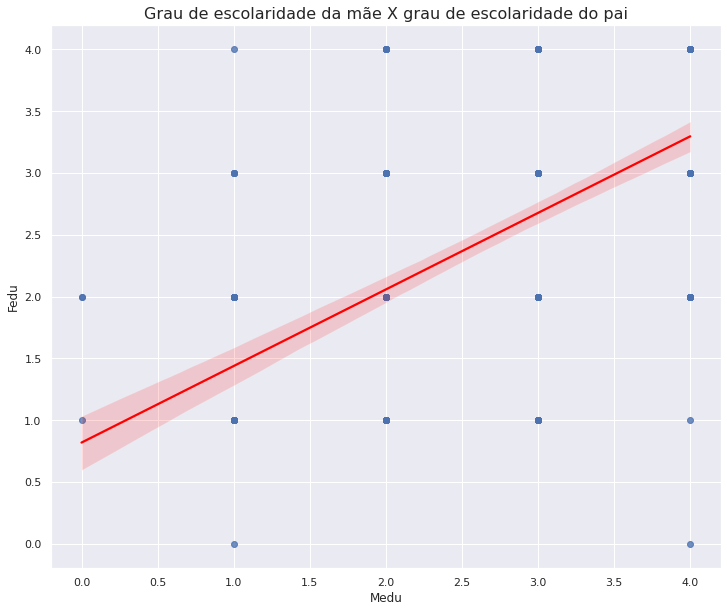

In [44]:
plt.figure(figsize= (12, 10))
sns.regplot(data= data, x= 'Medu', y= 'Fedu', line_kws= {'color': 'red'})
plt.title('Grau de escolaridade da mãe X grau de escolaridade do pai', fontsize= 16)
plt.show()

Observa se um tendência positiva entre as duas variáveis.

* A variável `Fedu` influencia nas notas do aluno?

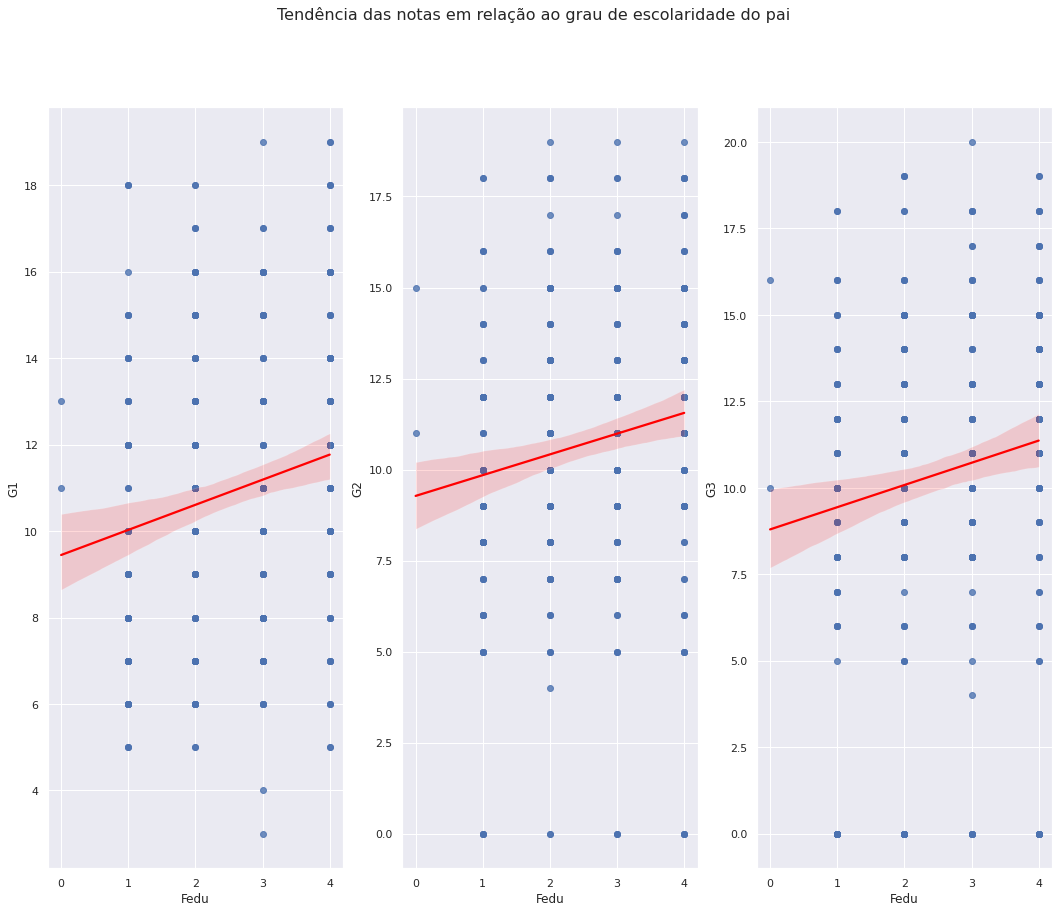

In [45]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
plt.suptitle('Tendência das notas em relação ao grau de escolaridade do pai', fontsize= 16)
ax1 = sns.regplot(data= data, x= 'Fedu', y= 'G1', ax= axes[0], line_kws= {'color': 'red'})
ax2 = sns.regplot(data= data, x= 'Fedu', y= 'G2', ax= axes[1], line_kws= {'color': 'red'})
ax3 = sns.regplot(data= data, x= 'Fedu', y= 'G3', ax= axes[2], line_kws= {'color': 'red'})
plt.show()

## Coluna `Mjob`

Contém informações sobre a ocupação da mãe.

In [46]:
data['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

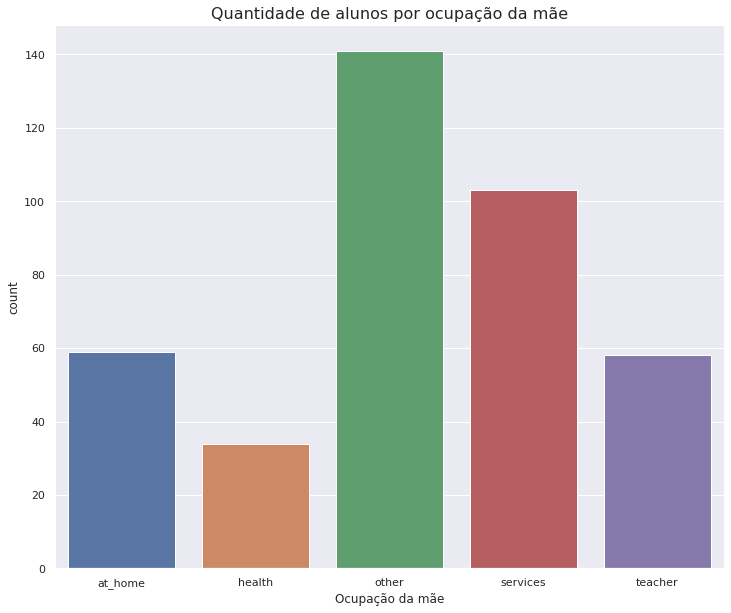

In [47]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'Mjob')
plt.title('Quantidade de alunos por ocupação da mãe', fontsize= 16)
plt.xlabel('Ocupação da mãe')
plt.show()

* A profissão da mãe influencia na nota do aluno?

In [48]:
average_grades_mjob = pd.DataFrame(data.groupby('Mjob')[['G1', 'G2', 'G3']].mean().round(2))
average_grades_mjob

,G1,G2,G3
Mjob,,,
at_home,10.46,9.68,9.15
health,12.21,12.35,12.15
other,10.18,10.18,9.82
services,11.39,11.21,11.02
teacher,11.53,11.22,11.05


As classes professora e área da saúde possuem as melhores médias entre as ocupações.

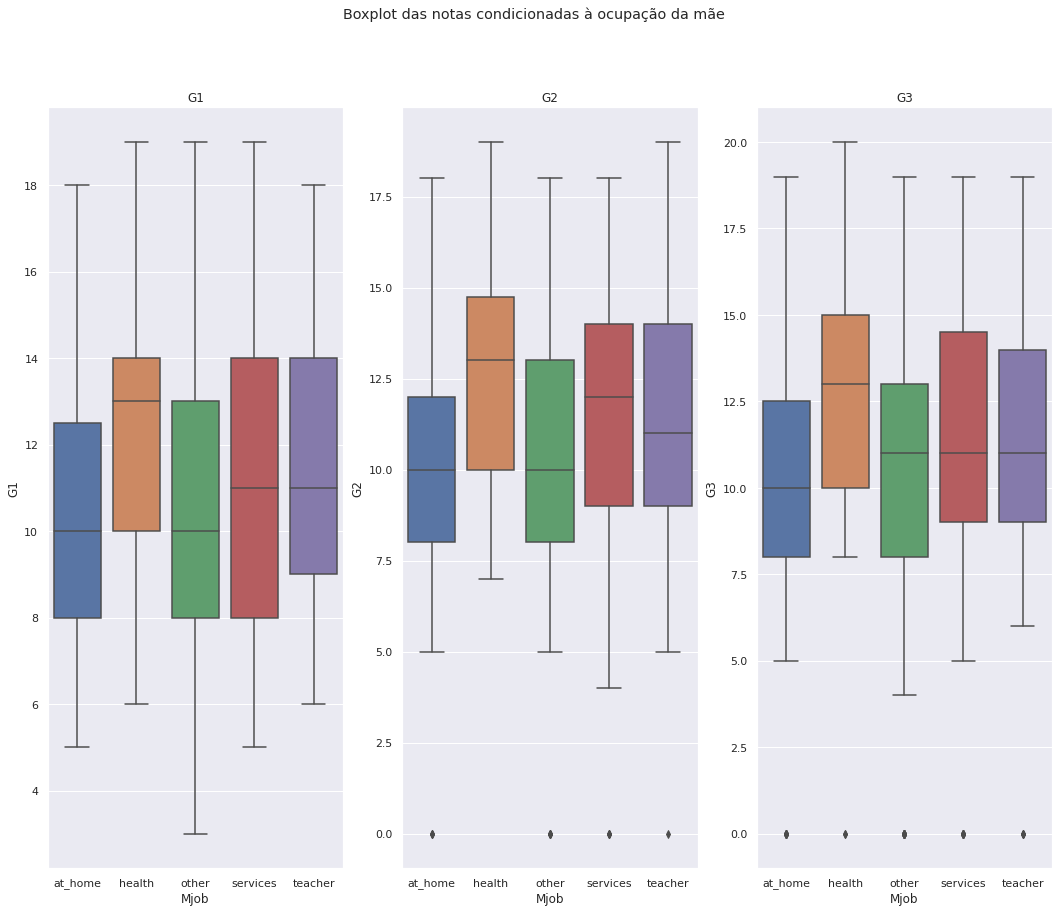

In [49]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
plt.suptitle('Boxplot das notas condicionadas à ocupação da mãe')
ax1 = sns.boxplot(data= data, x= 'Mjob', y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= 'Mjob', y= 'G2', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= data, x= 'Mjob', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

## Coluna `Fjob`

In [50]:
data['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

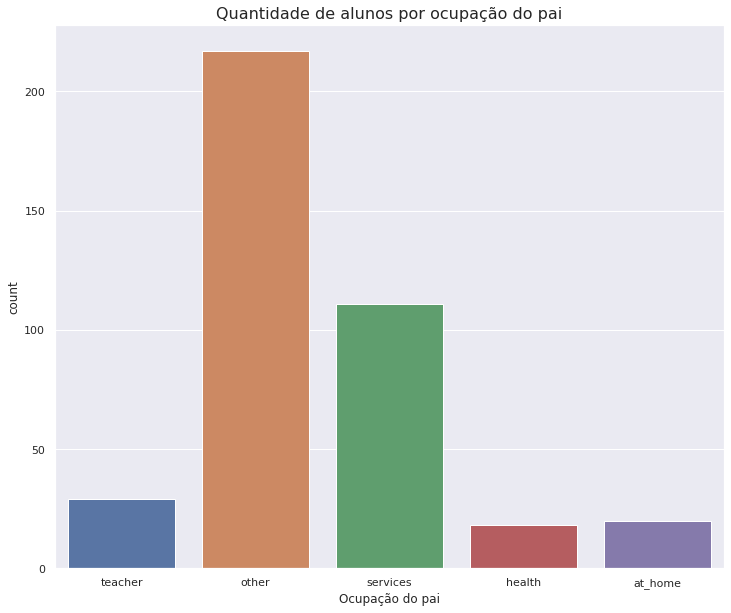

In [51]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'Fjob')
plt.title('Quantidade de alunos por ocupação do pai', fontsize= 16)
plt.xlabel('Ocupação do pai')
plt.show()

* Porcentagem de pais e de mães por classe de ocupação:

In [52]:
labels = list(data['Mjob'].unique())
mjob = list((data['Mjob'].value_counts(normalize= True) * 100).round(2))
fjob = list((data['Fjob'].value_counts(normalize= True) * 100).round(2))

In [53]:
x = np.arange(len(labels))
width = 0.35

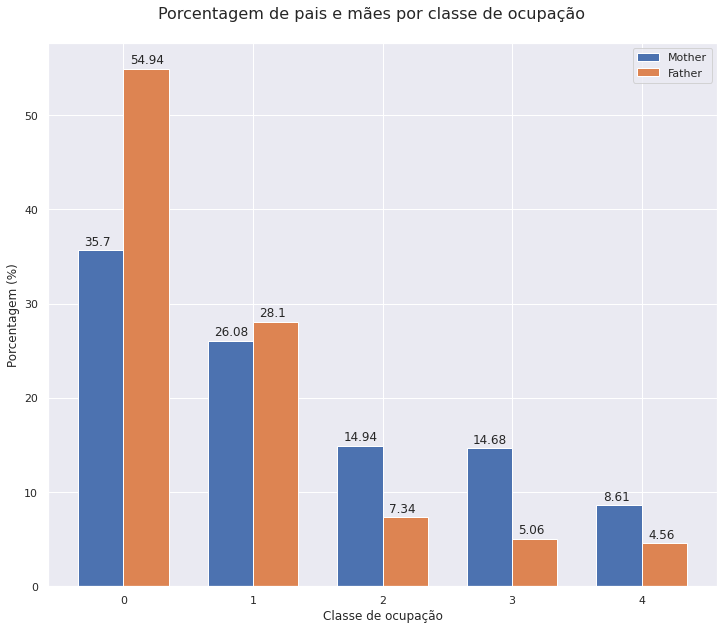

In [54]:
fig, ax = plt.subplots(figsize= (12, 10))
plt.suptitle('Porcentagem de pais e mães por classe de ocupação', fontsize= 16, y= 0.93)
ax1 = ax.bar(x - width/2, mjob, width, label= 'Mother')
bar_label(ax1, 0.05, 0.5, 12)
ax2 = ax.bar(x + width/2, fjob, width, label= 'Father')
bar_label(ax2, 0.05, 0.5, 12)
plt.legend()
plt.ylabel('Porcentagem (%)')
plt.xlabel('Classe de ocupação')
plt.show()

In [55]:
data['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

As classes são:
* Outras - 0;
* Serviços - 1;
* Em casa - 2;
* Professor - 3;
* Saúde - 4.

* A ocupação do pai influencia nas notas do aluno?

In [65]:
pd.DataFrame(data.groupby('Fjob')[['G1', 'G2', 'G3']].mean().round(2))

,G1,G2,G3
Fjob,,,
at_home,11.70,10.60,10.15
health,11.44,11.39,11.61
other,10.57,10.41,10.19
services,10.83,10.88,10.30
teacher,12.90,12.00,11.97


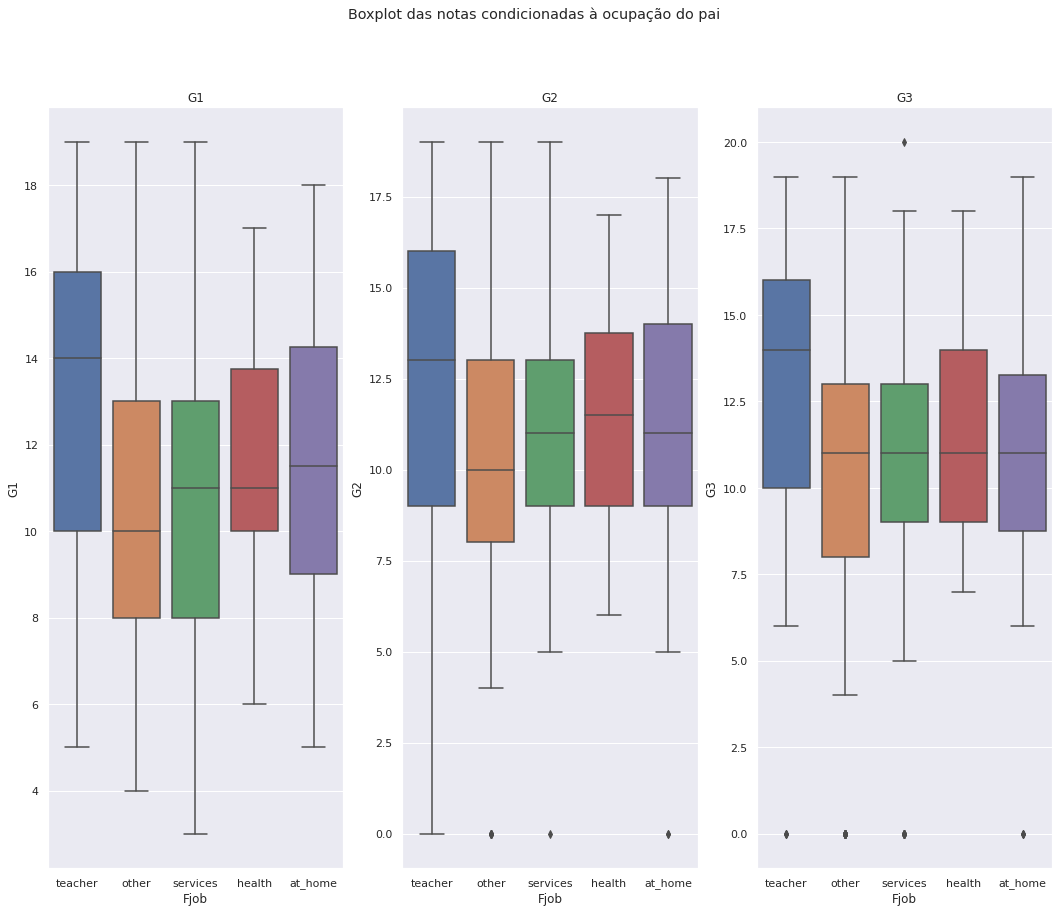

In [56]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
plt.suptitle('Boxplot das notas condicionadas à ocupação do pai')
ax1 = sns.boxplot(data= data, x= 'Fjob', y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= 'Fjob', y= 'G2', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= data, x= 'Fjob', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

Filhos de pai professor tendem a apresentar as melhores notas.

## Coluna `guardian`

Indica quem é o responsável direto pelo estudante.

In [58]:
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

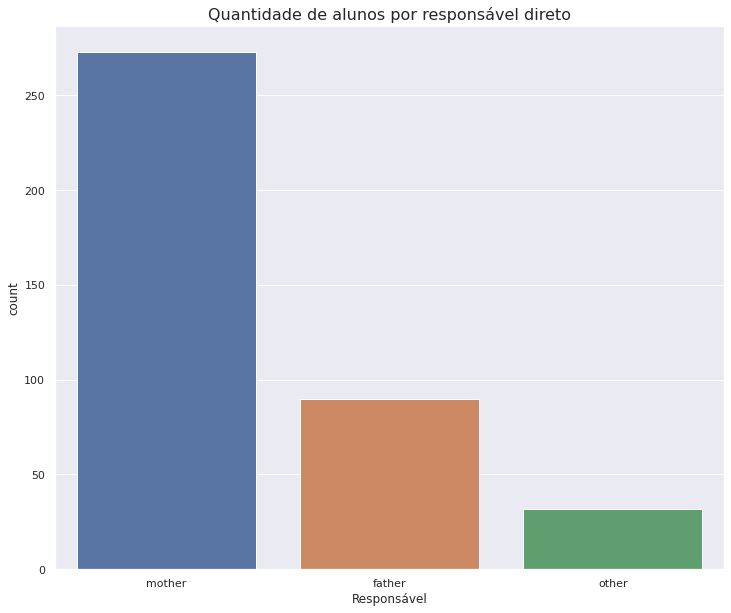

In [60]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'guardian')
plt.title('Quantidade de alunos por responsável direto', fontsize= 16)
plt.xlabel('Responsável')
plt.show()

* O responsável influencia nas notas dos estudantes?

In [70]:
pd.DataFrame(data.groupby('guardian')[['G1', 'G2', 'G3']].mean())

,G1,G2,G3
guardian,,,
father,11.111111,11.155556,10.688889
mother,10.882784,10.677656,10.483516
other,10.562500,9.781250,9.062500


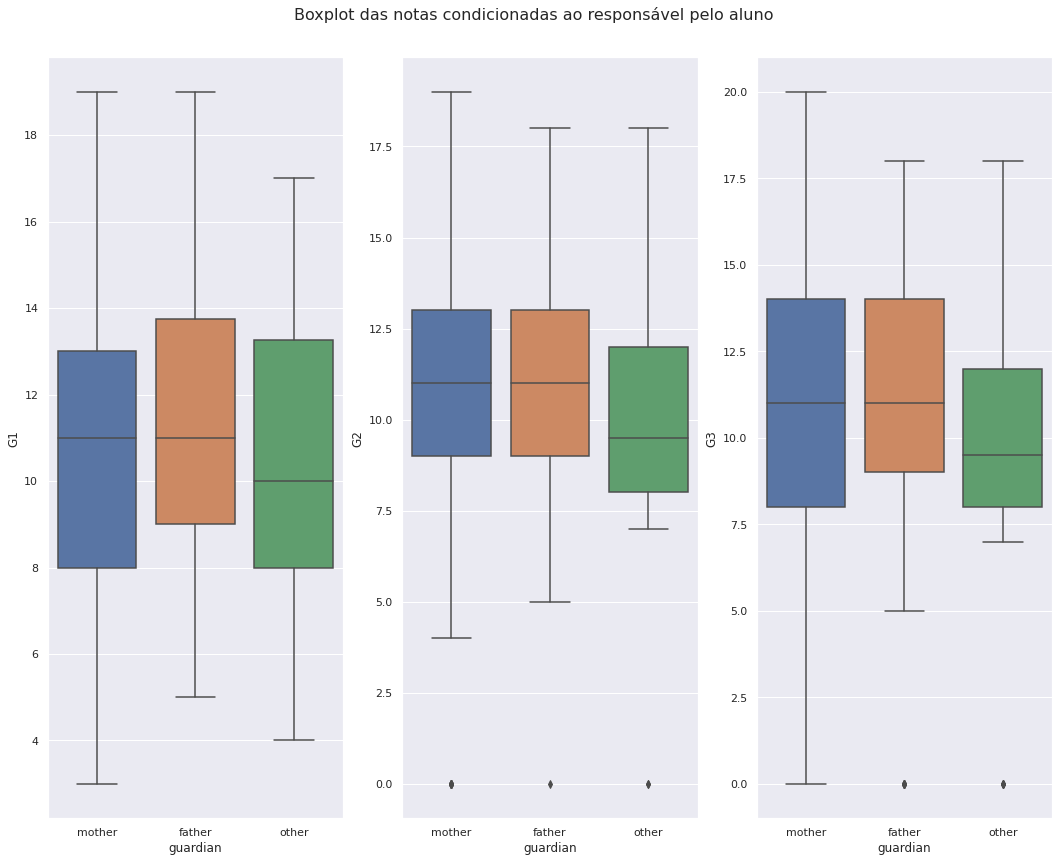

In [63]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
plt.suptitle('Boxplot das notas condicionadas ao responsável pelo aluno', fontsize= 16, y= 0.93)
sns.boxplot(data= data, x= 'guardian', y= 'G1', ax= axes[0])
sns.boxplot(data= data, x= 'guardian', y= 'G2', ax= axes[1])
sns.boxplot(data= data, x= 'guardian', y= 'G3', ax= axes[2])
plt.show()

Os alunos que tem como responsáveis *outros*, ou seja, alguém que não é pai ou mãe apresentam piores resultos nos exames. Há uma variação pequena entre os alunos que têm como responsáveis pai ou mãe.

## Coluna `studytime`

In [71]:
data['studytime'].unique()

array([2, 3, 1, 4])

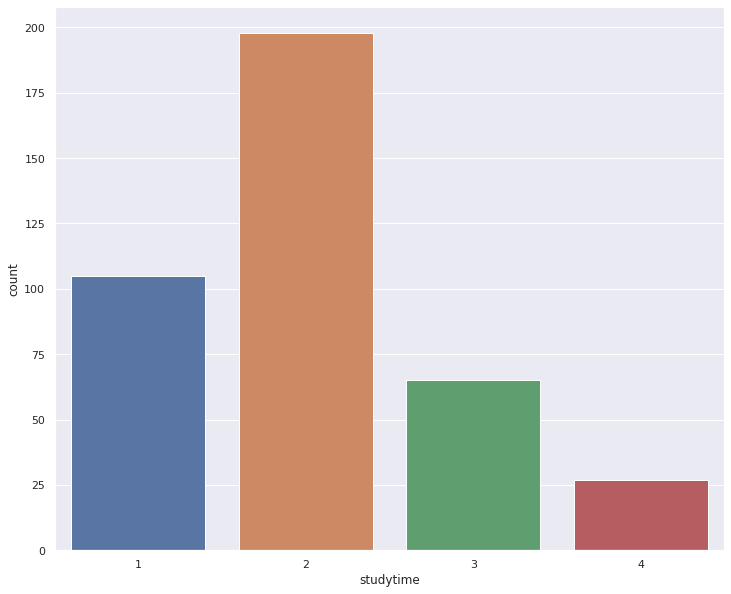

In [72]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'studytime')
plt.show()

Lembrando que o tempo semanal de estudo:
* 1 - Menos de 2h; 
* 2 - Entre 2 e 5h; 
* 3 - Entre 5 e 10h; 
* 4 - Mais de 10h.

In [74]:
percentage_study_time = data['studytime'].value_counts(normalize= True) * 100
percentage_study_time.round(2)

2    50.13
1    26.58
3    16.46
4     6.84
Name: studytime, dtype: float64

Mais de 75% dos estudantes estudam menos de 2h por semana;
Apenas 6,84% dedicam mais de 10h por semana para estudar.

* Como o tempo de estudo influencia a nota dos alunos?

In [78]:
pd.DataFrame(data.groupby('studytime')[['G1', 'G2', 'G3']].mean().round(2))

,G1,G2,G3
studytime,,,
1,10.44,10.28,10.05
2,10.65,10.51,10.17
3,12.05,11.51,11.40
4,11.89,12.04,11.26


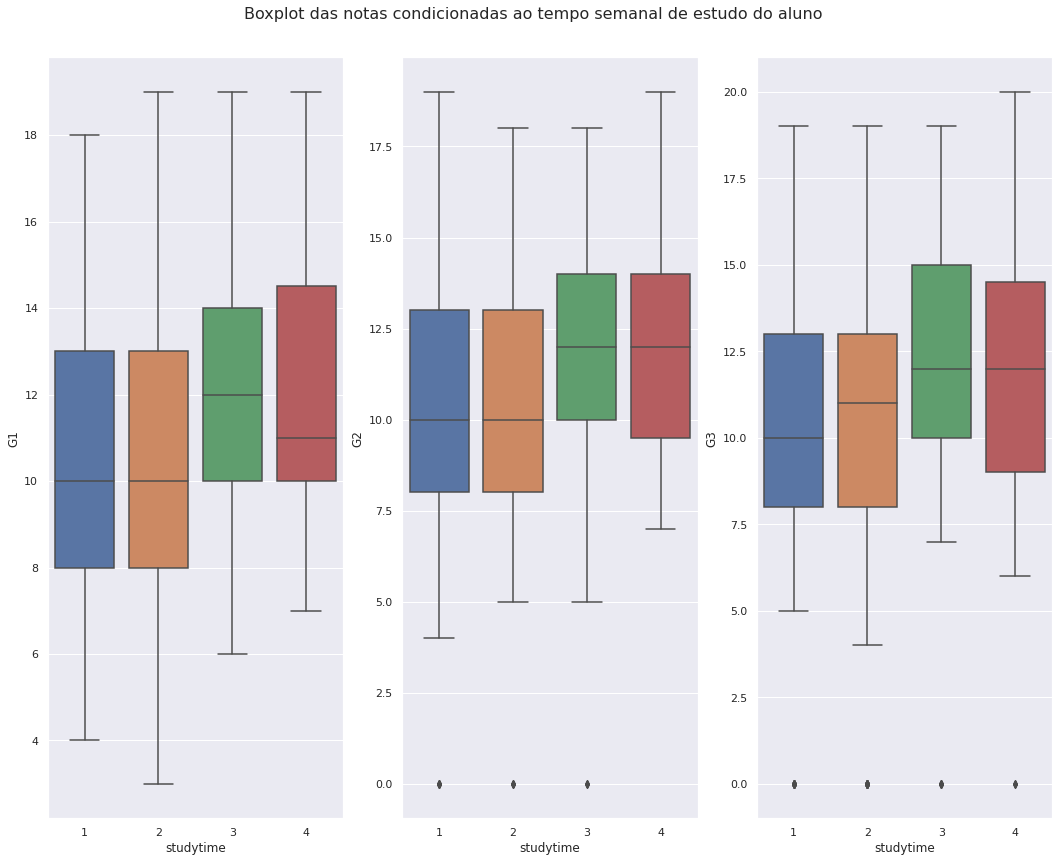

In [76]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
plt.suptitle('Boxplot das notas condicionadas ao tempo semanal de estudo do aluno', fontsize= 16, y= 0.93)
sns.boxplot(data= data, x= 'studytime', y= 'G1', ax= axes[0])
sns.boxplot(data= data, x= 'studytime', y= 'G2', ax= axes[1])
sns.boxplot(data= data, x= 'studytime', y= 'G3', ax= axes[2])
plt.show()

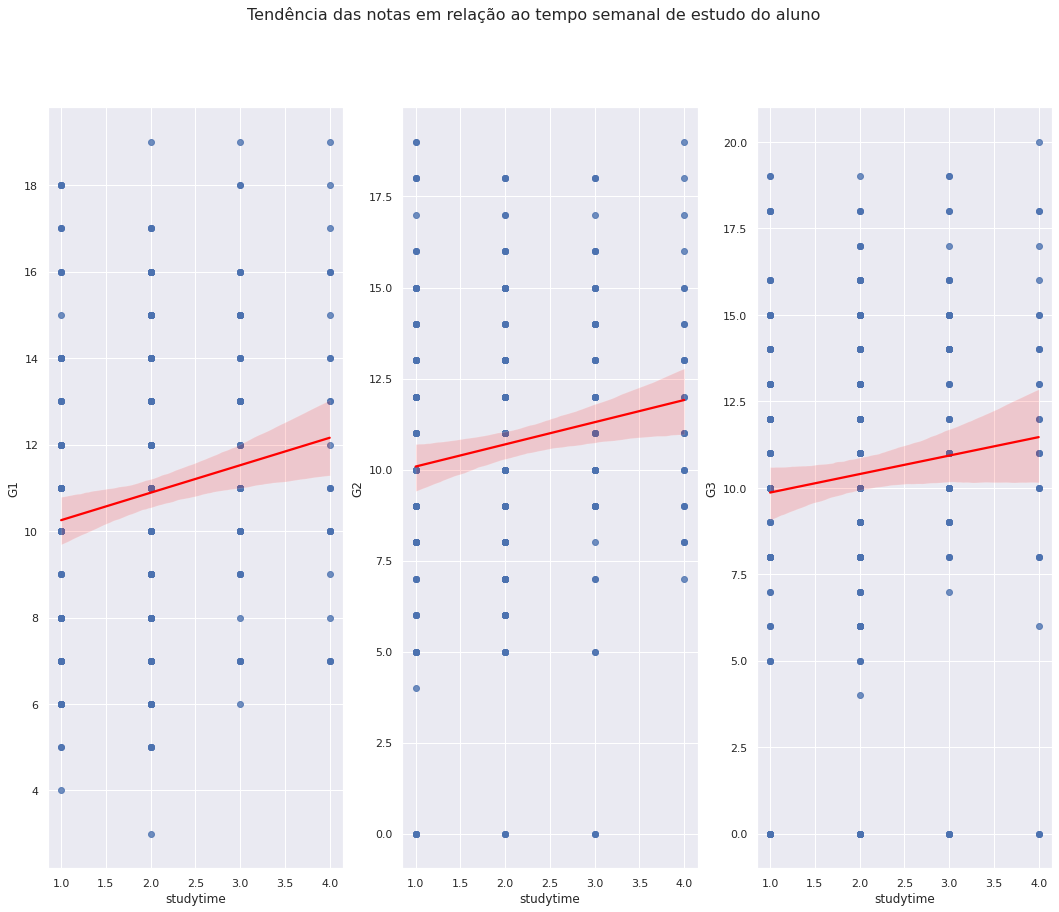

In [79]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
plt.suptitle('Tendência das notas em relação ao tempo semanal de estudo do aluno', fontsize= 16)
ax1 = sns.regplot(data= data, x= 'studytime', y= 'G1', ax= axes[0], line_kws= {'color': 'red'})
ax2 = sns.regplot(data= data, x= 'studytime', y= 'G2', ax= axes[1], line_kws= {'color': 'red'})
ax3 = sns.regplot(data= data, x= 'studytime', y= 'G3', ax= axes[2], line_kws= {'color': 'red'})
plt.show()

É possível observar que alunos que estudam mais horas por semana tendem a apresentar melhores notas.

## Coluna `higher`

Indica quais alunos almejar uma educação melhor.

In [80]:
data['higher'].unique()

array(['yes', 'no'], dtype=object)

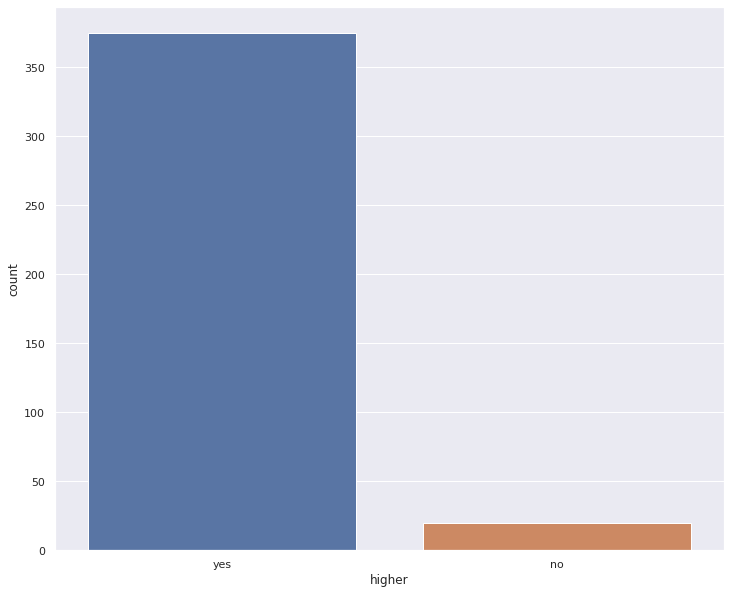

In [81]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'higher')
plt.show()

In [83]:
pd.DataFrame(data.groupby('higher')[['G1', 'G2', 'G3']].mean().round(2))

,G1,G2,G3
higher,,,
no,8.35,7.80,6.80
yes,11.05,10.87,10.61


Os alunos que respondem **NÃO** apresentam notas menores. O fato de responder que **SIM** não possui, exatamente, com as melhores notas.

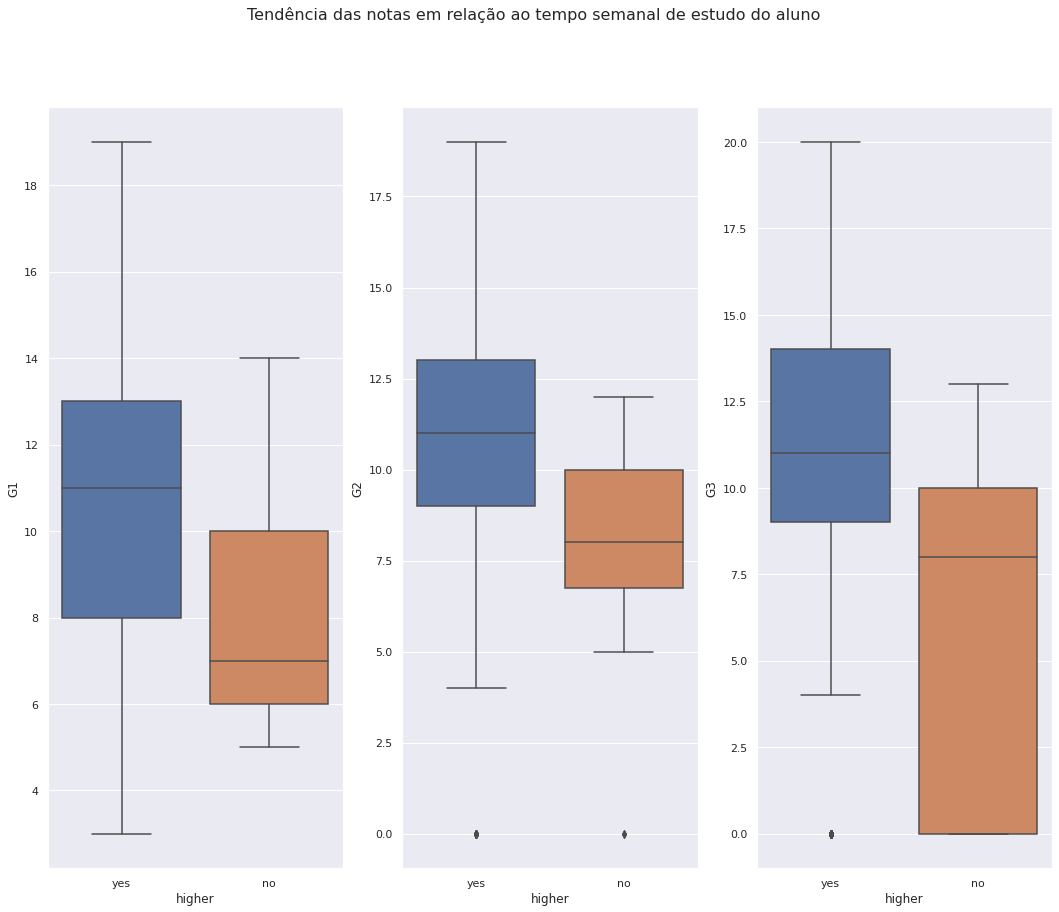

In [86]:
fig, axes = plt.subplots(1, 3, figsize= (18, 14))
plt.suptitle('Tendência das notas em relação ao tempo semanal de estudo do aluno', fontsize= 16)
ax1 = sns.boxplot(data= data, x= 'higher', y= 'G1', ax= axes[0])
ax2 = sns.boxplot(data= data, x= 'higher', y= 'G2', ax= axes[1])
ax3 = sns.boxplot(data= data, x= 'higher', y= 'G3', ax= axes[2])
plt.show()